In [7]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np

In [12]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd

In [15]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     ---                                   30.7/293.3 kB 660.6 kB/s eta 0:00:01
     ---                                   30.7/293.3 kB 660.6 kB/s eta 0:00:01
     ---                                   30.7/293.3 kB 660.6 kB/s eta 0:00:01
     -------                               61.4/293.3 kB 272.3 kB/s eta 0:00:01
     -----------                           92.2/293.3 kB 350.1 kB/s eta 0:00:01
     -----------                           92.2/293.3 kB 350.1 kB/s eta 0:00:01
     -----------                           92.2/293.3 kB 350.1 kB/s eta 0:00:01
     -------------                        112.6/293.3 kB 273.1 kB/s eta 0:00:01
     ---------------                      122.9/293.3 kB 277.4 kB/s eta 0:00:01
     ---------------------                174.1/293.3 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("train.csv")

In [19]:
df.shape
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [22]:
df.sample(10) #gives any random sample values

,id,qid1,qid2,question1,question2,is_duplicate
163380,163380,254139,254140,"If a guy follows female models on Instagram, i...",How can I help my 3 week old baby dove to walk?,0
52193,52193,92456,92457,What do black and Italian mixed babies look like?,How is skin color determined in babies?,0
212176,212176,19572,20307,Would Donald Trump make a good U.S president? ...,Will Trump will make a great POTUS?,1
49672,49672,88381,88382,Does the Bible say that the world was created ...,Why do bible scholars believe that man is only...,0
83744,83744,141703,38558,Which is the best laptop in range of 40000 to ...,Which is the best laptop to buy at price range...,1
95467,95467,159213,159214,Will the USA ever pay back the debt it owes to...,How do I find out all the debt I owe?,0
143225,143225,50700,35010,Is Spotify not available in India?,Daniel Ek: What are the hardships for Spotify ...,1
6943,6943,13588,13589,What is social media? And it's examples,"I did my graduation in production engineering,...",0
59389,59389,104020,104021,Which app changed your life?,Can meditation change your life?,0
246388,246388,359431,359432,Why would you keep laundry packs away from chi...,Accenture location for freshers?,0


In [23]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [24]:
#duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

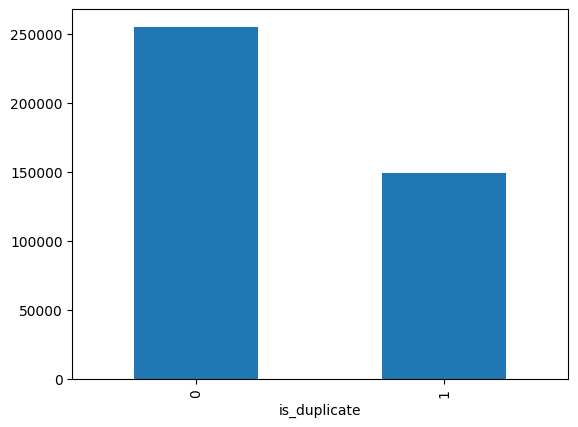

In [25]:
#distribution of duplicate and non-duplicate values
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [26]:
#repeated questions

qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number od unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number od unique questions 537933
Number of questions getting repeated 111780


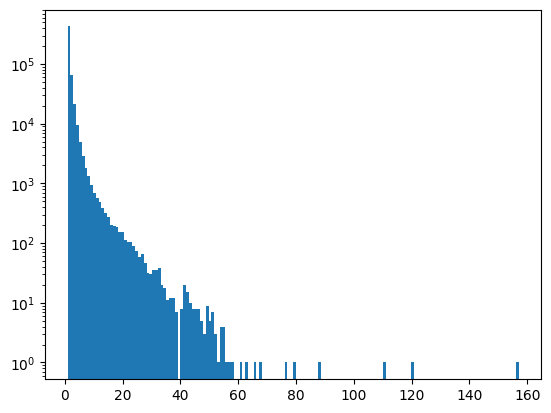

In [27]:
#repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()